### Discretization

Data discretization is a process of converting continuous data into discrete buckets or intervals. This is often done to reduce the number of possible values a feature can take, making the data easier to analyze and interpret. Discretization can also help improve the performance of machine learning algorithms by reducing noise and handling outliers more effectively.

There are several methods for discretizing data, including:

1. **Equal-width Binning**  
    Divides the range of the data into equal-sized intervals.

2. **Equal-frequency Binning**  
    Divides the data into intervals that each contain approximately the same number of observations.

3. **K-means Clustering**  
    Uses the K-means algorithm to group data into K clusters, where each cluster represents a discrete interval.

4. **Decision Tree Binning**  
    Uses a decision tree algorithm to determine the optimal intervals based on the target variable.

Discretization is particularly useful in scenarios where the relationship between the feature and the target variable is non-linear or when the data contains a lot of noise.

In [20]:
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

In [21]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [22]:
# impute Missing values
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())

In [23]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='age', ylabel='Count'>

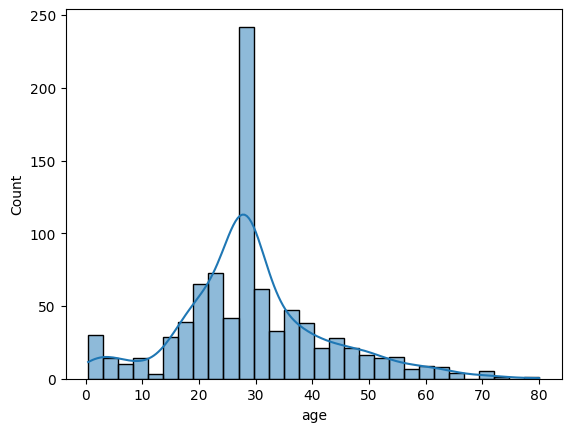

In [24]:
sns.histplot(df['age'], kde=True)

In [25]:
# age discretization
age_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df['age_bin'] = age_discretizer.fit_transform(df[['age']])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bin
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1.0


<Axes: xlabel='age', ylabel='Count'>

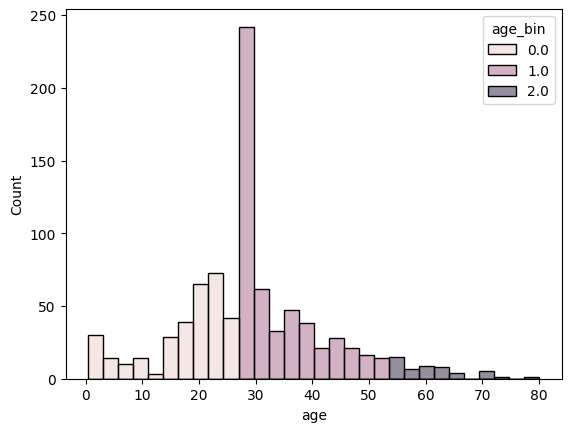

In [26]:
sns.histplot(df, x='age', hue = 'age_bin')

<Axes: xlabel='age', ylabel='Count'>

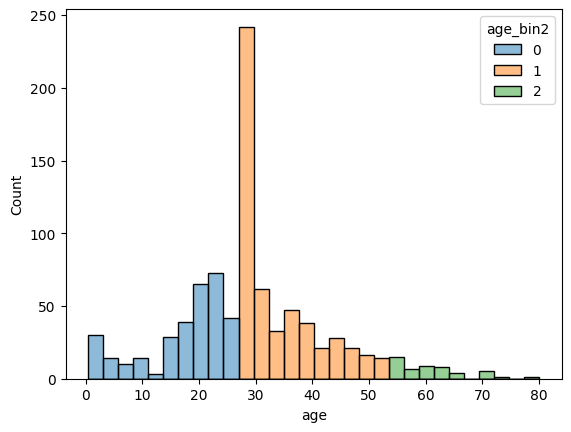

In [27]:
# pandas method for manual binning
df['age_bin2'] = pd.cut(df['age'], bins=3, labels=[0,1,2])
sns.histplot(df, x='age', hue = 'age_bin2')

<Axes: xlabel='age', ylabel='Count'>

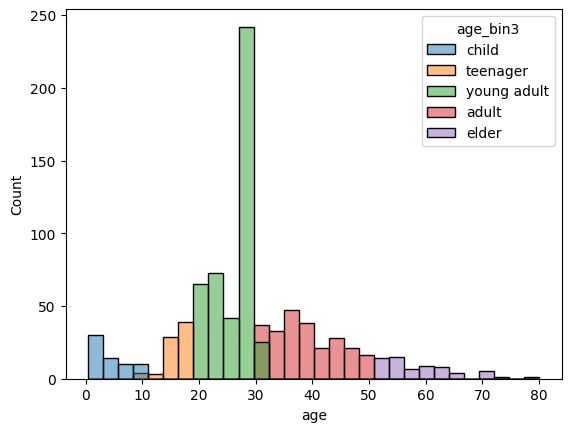

In [28]:
# define the bins
bins = [0, 10, 18, 30, 50, 80]
labels = ['child', 'teenager', 'young adult', 'adult', 'elder']
df['age_bin3'] = pd.cut(df['age'], bins=bins, labels=labels)
sns.histplot(df, x='age', hue = 'age_bin3')